In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sb
from io import StringIO

Consequence table from [Szymanski et al. 2009](http://www.fws.gov/northeast/pdf/WNS_SDM_Report_Final_14Oct09.pdf)

In [22]:
consequence_data = """
1	A	A	A	0.880	92.5	0.0625	0.000	1252	1.750
2	B	B	B	0.880	75.0	0.0625	0.667	1252	2.000
3	C	C	C	0.880	75.0	0.0250	1.667	1252	1.750
4	C	C	B	0.880	75.0	0.0250	1.333	1252	1.750
5	D	D	D	0.760	100.0	0.0625	3.000	931	1.750
6	D	D	B	0.760	100.0	0.0625	2.667	931	1.750
7	E	E	E	0.760	68.1	0.0250	3.000	466	2.000
8	E	E	C	0.760	75.0	0.0250	2.333	466	2.000
9	F	E	E	0.760	60.6	0.0250	3.000	448	1.625
10	F	E	C	0.760	60.6	0.0250	2.333	448	1.625
11	G	G	C	0.760	100.0	0.0250	2.333	8818	1.875
12	G	E	C	0.760	100.0	0.0250	2.333	787	2.000
13	H	H	C	0.707	100.0	0.0250	2.333	7700	1.750
14	H	E	C	0.707	100.0	0.0250	2.333	744	2.000
15	I	I	C	0.707	100.0	0.0250	2.333	12543	1.750
16	I	H	C	0.707	100.0	0.0250	2.333	7886	2.000
17	I	E	C	0.707	100.0	0.0250	2.333	930	2.000
18	J	I	C	0.707	100.0	0.0250	2.333	12672	1.500
19	J	G	C	0.707	100.0	0.0250	2.333	9090	1.500
20	J	E	C	0.707	100.0	0.0250	2.333	1059	1.750
21	K	K	C	0.680	100.0	0.0250	2.333	23348	1.500
22	K	H	C	0.680	100.0	0.0250	2.333	8302	1.500
23	K	E	C	0.680	100.0	0.0250	2.333	1346	1.500
"""

In [30]:
consequence_table = pd.DataFrame.from_csv(StringIO(consequence_data), sep='\t', header=None, index_col=None)
consequence_table.columns = ("Alternative", "Affected", "Near Affected", "Far From Affected", 
                           "Obj1", "Obj2", "Obj3", "Obj4", "Obj5", "Obj6")

In [31]:
consequence_table.head()

,Alternative,Affected,Near Affected,Far From Affected,Obj1,Obj2,Obj3,Obj4,Obj5,Obj6
0,1,A,A,A,0.88,92.5,0.0625,0.000,1252,1.75
1,2,B,B,B,0.88,75.0,0.0625,0.667,1252,2.00
2,3,C,C,C,0.88,75.0,0.0250,1.667,1252,1.75
3,4,C,C,B,0.88,75.0,0.0250,1.333,1252,1.75
4,5,D,D,D,0.76,100.0,0.0625,3.000,931,1.75


Normalize objectives

In [32]:
# Normalization function
normalize = lambda o: (o - o.min()) / (o.max() - o.min())

In [36]:
objectives = ["Obj1", "Obj2", "Obj3", "Obj4", "Obj5", "Obj6"]
normalized_objectives = consequence_table[objectives].apply(normalize)
normalized_objectives

,Obj1,Obj2,Obj3,Obj4,Obj5,Obj6
0,1.000,0.809645,1,0.000000,0.035109,0.50
1,1.000,0.365482,1,0.222333,0.035109,1.00
2,1.000,0.365482,0,0.555667,0.035109,0.50
3,1.000,0.365482,0,0.444333,0.035109,0.50
4,0.400,1.000000,1,1.000000,0.021092,0.50
5,0.400,1.000000,1,0.889000,0.021092,0.50
6,0.400,0.190355,0,1.000000,0.000786,1.00
7,0.400,0.365482,0,0.777667,0.000786,1.00
8,0.400,0.000000,0,1.000000,0.000000,0.25
9,0.400,0.000000,0,0.777667,0.000000,0.25


Create vector for weights on objectives, and populate with wighted performance of each alternative

In [62]:
weights = [0.5, 0.2, 0.11, 0.09, 0.06, 0.04]
assert sum(weights) == 1

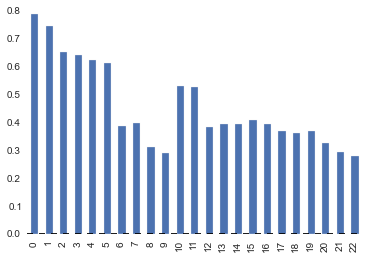

In [49]:
normalized_objectives.apply(lambda x: x*weights, axis=1).sum(1).plot(kind='bar')

Equal weights

In [50]:
equal_weights = lambda x: x/float(len(x))

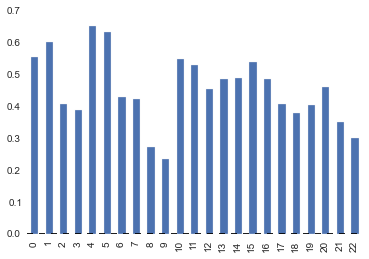

In [51]:
normalized_objectives.apply(equal_weights, axis=1).sum(1).plot(kind='bar')

Rank order centroid weights

In [94]:
rank_centroid_weights = lambda x, ranks: x * np.array([(1/ranks)[ranks>=i].sum() for i in ranks])/len(x)

In [95]:
ranks = np.array([3,4,1,5,2,6])

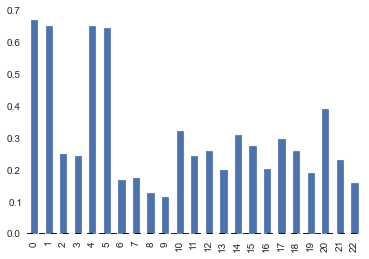

In [96]:
normalized_objectives.apply(rank_centroid_weights, args=(ranks,), axis=1).sum(1).plot(kind='bar')

Rank sum weights

In [70]:
rank_sum_weights = lambda x, rank: x * 2.*(len(x) + 1 - np.array(rank))/(len(x)*(len(x)+1))

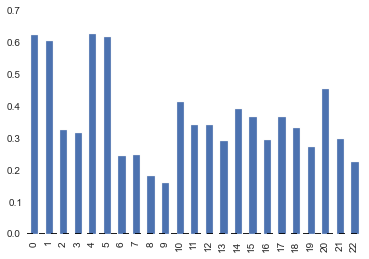

In [74]:
normalized_objectives.apply(rank_sum_weights, args=(ranks,), axis=1).sum(1).plot(kind='bar')